In [1]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import csv

In [2]:
# .npy file path
file_path = 'word2vec_vectors.npy'

# numpy.load file
word2vec_vectors_loaded = np.load(file_path)

print("word2vec_vectors successfully loaded.")
print(f"loaded matrix shape：{word2vec_vectors_loaded.shape}")

word2vec_vectors successfully loaded.
loaded matrix shape：(629814, 300)


In [3]:
# initialize PCA model
pca = PCA(n_components=128)

# fit and transform
word2vec_vectors_reduced = pca.fit_transform(word2vec_vectors_loaded)

In [4]:
word2vec_vectors_reduced.shape

(629814, 128)

In [11]:
np.save('word2vec_vectors_reduced.npy', word2vec_vectors_reduced)

In [5]:
sum(pca.explained_variance_ratio_[:128]) * 100

79.78638511277653

In [6]:
# set cluster number
n_clusters = 7  # 举例

# initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)

# cluster
clusters = kmeans.fit_predict(word2vec_vectors_reduced)

print(f"clustering complete.")

clustering complete.


In [7]:
# randomly select a subset
subset_indices = np.random.choice(word2vec_vectors_reduced.shape[0], size=100000, replace=False)  # 示例：100000个样本
subset_vectors = word2vec_vectors_reduced[subset_indices]
subset_clusters = clusters[subset_indices]

# calculate silhouette_score
score = silhouette_score(subset_vectors, subset_clusters, n_jobs=-1)

print(f"silhouette score（based on subset）：{score}")

silhouette score（based on subset）：0.10002280292831703


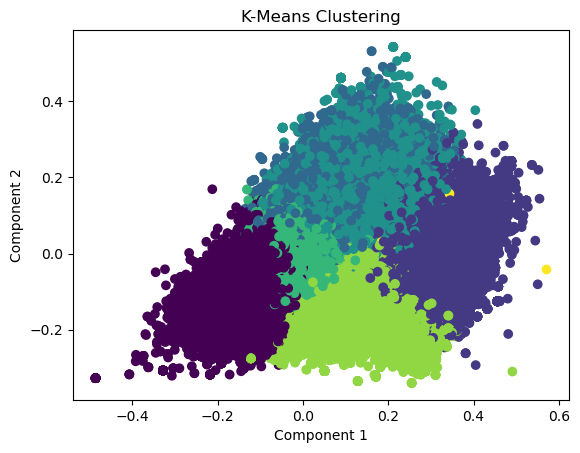

In [8]:
# reduce to 2 dimension
pca_temp = PCA(n_components=2)

# fit and transform
temp = pca.fit_transform(word2vec_vectors_reduced)

# visualize the clusters
plt.scatter(temp[:, 0], temp[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering')
plt.show()

In [9]:
# 获取唯一的聚类标签及其出现次数
unique_clusters, counts = np.unique(clusters, return_counts=True)

# 遍历唯一的聚类标签和它们的计数，打印每个聚类的数量
for cluster_id, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster_id}: {count} documents")

Cluster 0: 283915 documents
Cluster 1: 57884 documents
Cluster 2: 70604 documents
Cluster 3: 41794 documents
Cluster 4: 112888 documents
Cluster 5: 58865 documents
Cluster 6: 3864 documents


In [10]:
# 打开一个CSV文件准备写入结果
with open('cluster_internal_similarity.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # 写入CSV文件的表头
    writer.writerow(['ID1', 'ID2', 'Similarity'])

    # 遍历每个聚类
    for cluster_id in unique_clusters:
        # print cluster id
        print("initial cluster %d\n", cluster_id)
        # 找到当前聚类中所有文档的索引
        indices = np.where(clusters == cluster_id)[0]
        
        # 计算聚类内每对文档之间的相似度
        for i in range(len(indices)):
            vec1 = word2vec_vectors_reduced[indices[i]].reshape(1, -1)
            for j in range(i + 1, len(indices)):
                vec2 = word2vec_vectors_reduced[indices[j]].reshape(1, -1)
                # 计算相似度
                sim = cosine_similarity(vec1, vec2)[0][0]
                # 写入结果到CSV文件
                writer.writerow([indices[i], indices[j], sim])
            print("finish (%d / %d) for cluster %d\n", i, len(indices), cluster_id)
        print("finish cluster %d\n", cluster_id)

initial cluster %d
 0
finish (%d / %d) for cluster %d
 0 283915 0
finish (%d / %d) for cluster %d
 1 283915 0
finish (%d / %d) for cluster %d
 2 283915 0
finish (%d / %d) for cluster %d
 3 283915 0
finish (%d / %d) for cluster %d
 4 283915 0
finish (%d / %d) for cluster %d
 5 283915 0
finish (%d / %d) for cluster %d
 6 283915 0
finish (%d / %d) for cluster %d
 7 283915 0
finish (%d / %d) for cluster %d
 8 283915 0
finish (%d / %d) for cluster %d
 9 283915 0
finish (%d / %d) for cluster %d
 10 283915 0
finish (%d / %d) for cluster %d
 11 283915 0
finish (%d / %d) for cluster %d
 12 283915 0
finish (%d / %d) for cluster %d
 13 283915 0
finish (%d / %d) for cluster %d
 14 283915 0
finish (%d / %d) for cluster %d
 15 283915 0
finish (%d / %d) for cluster %d
 16 283915 0
finish (%d / %d) for cluster %d
 17 283915 0
finish (%d / %d) for cluster %d
 18 283915 0
finish (%d / %d) for cluster %d
 19 283915 0
finish (%d / %d) for cluster %d
 20 283915 0
finish (%d / %d) for cluster %d
 21 283915 

KeyboardInterrupt: 